In [ ]:
#https://www.bilibili.com/read/cv12949609/

In [3]:
setwd('/import/DB/workdir/cd40/')

In [4]:
library(CellChat)
library(patchwork)

In [5]:
cellchat.NL <- readRDS('./wt3d.cellchat.rds')
cellchat.LS <- readRDS('./ko3d.cellchat.rds')

In [6]:
cellchat.NL <- computeCommunProbPathway(cellchat.NL)
cellchat.NL <- netAnalysis_computeCentrality(cellchat.NL, slot.name = "netP")
cellchat.LS <- computeCommunProbPathway(cellchat.LS)
cellchat.LS <- netAnalysis_computeCentrality(cellchat.LS, slot.name = "netP")

In [7]:
cellchat.NL <- aggregateNet(cellchat.NL)
cellchat.LS <- aggregateNet(cellchat.LS)

In [8]:
object.list <- list(wt3d = cellchat.NL, ko3d = cellchat.LS)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



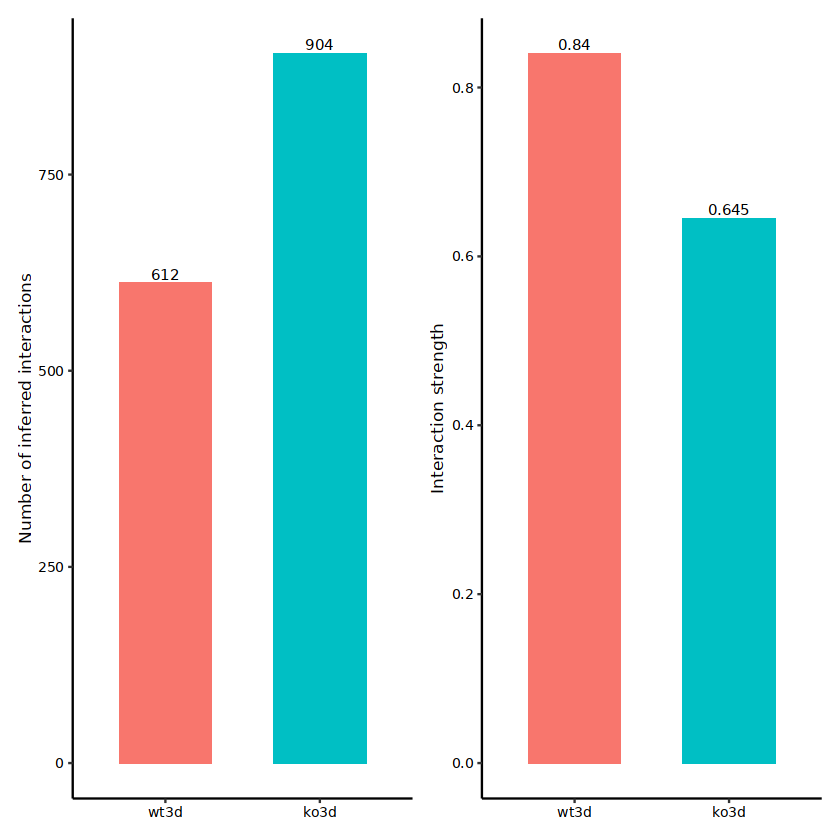

In [9]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

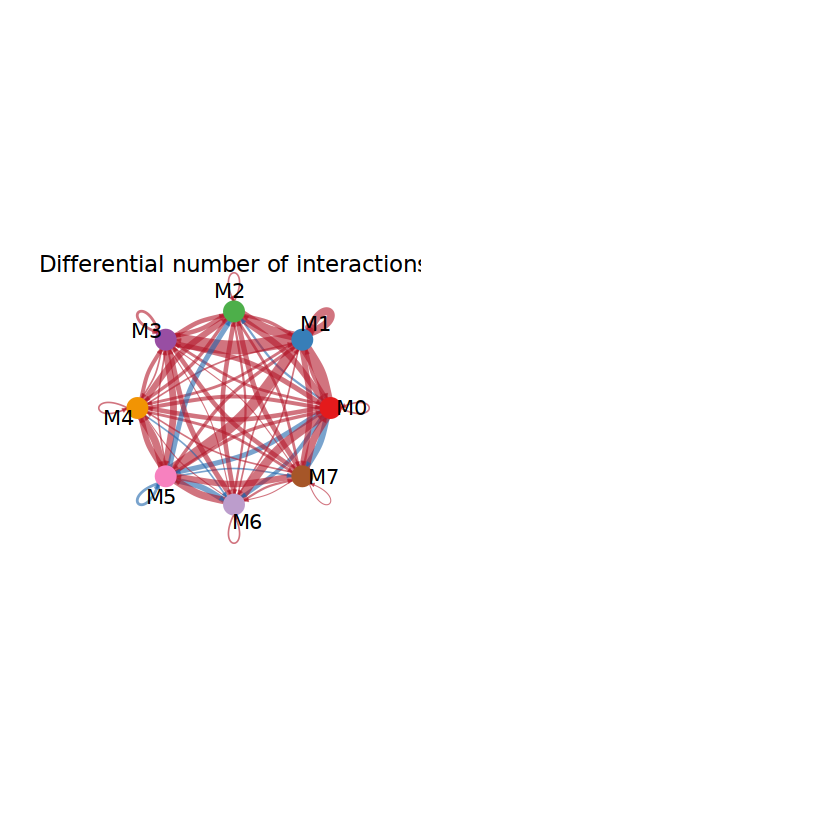

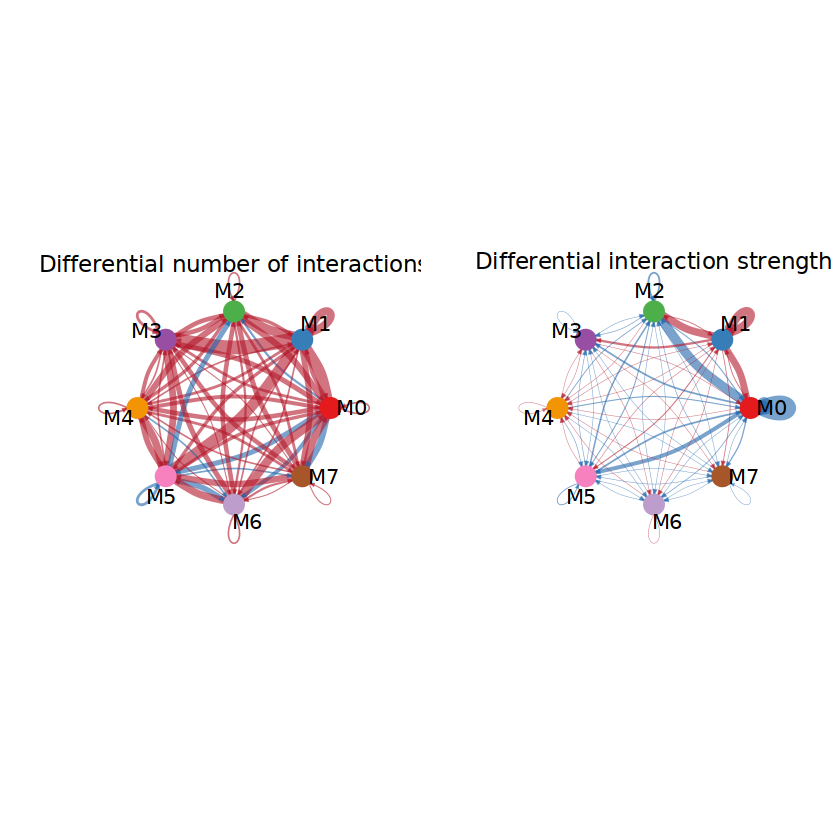

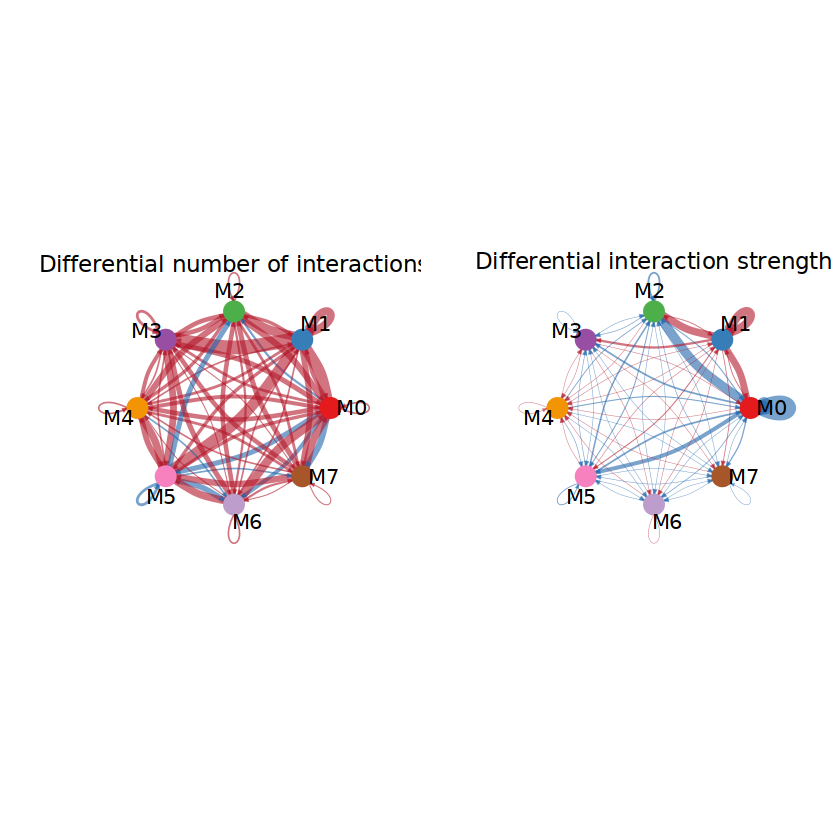

In [10]:
par(mfrow = c(1,2), xpd=TRUE)
netVisual_diffInteraction(cellchat, weight.scale = T)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight")

Do heatmap based on a merged object 




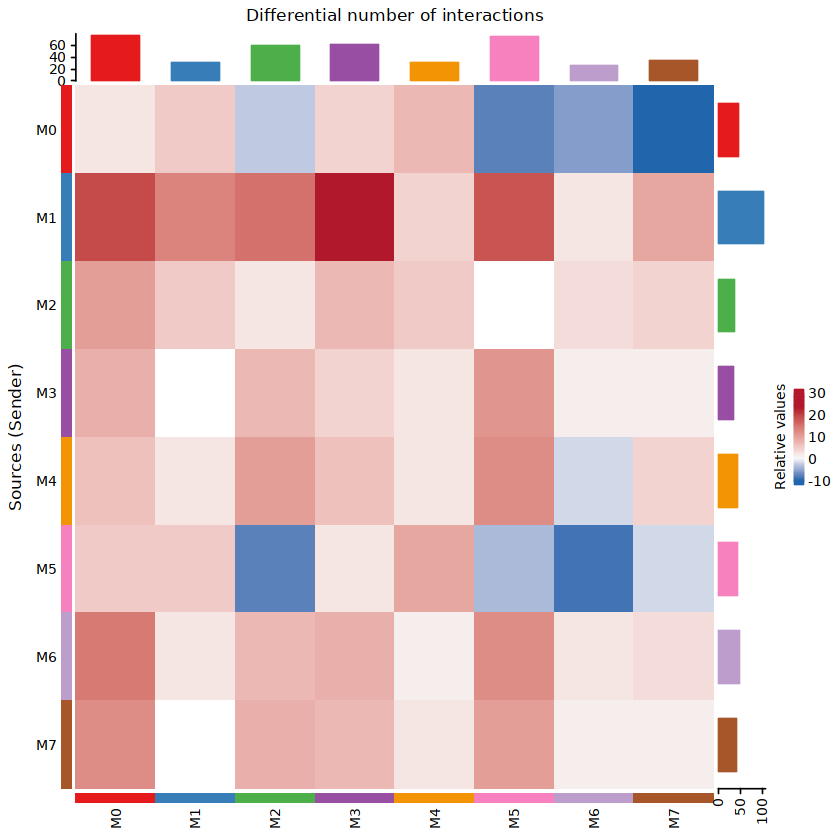

In [11]:
gg1 <- netVisual_heatmap(cellchat)
#> Do heatmap based on a merged object
#> Do heatmap based on a merged object
gg1 

Do heatmap based on a merged object 




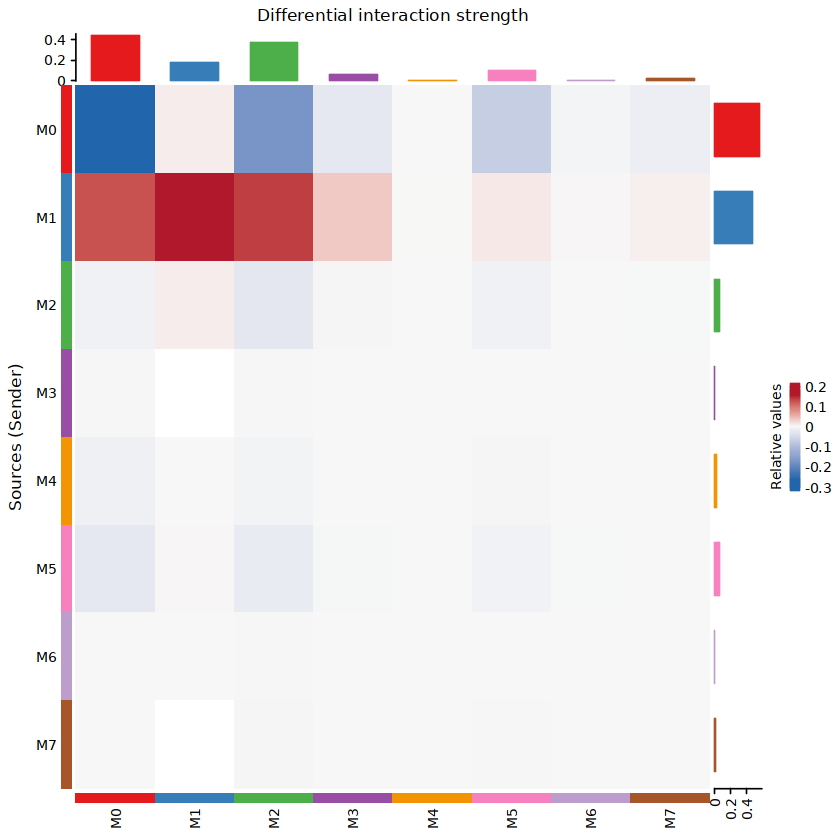

In [12]:
gg2 <- netVisual_heatmap(cellchat, measure = "weight")
gg2

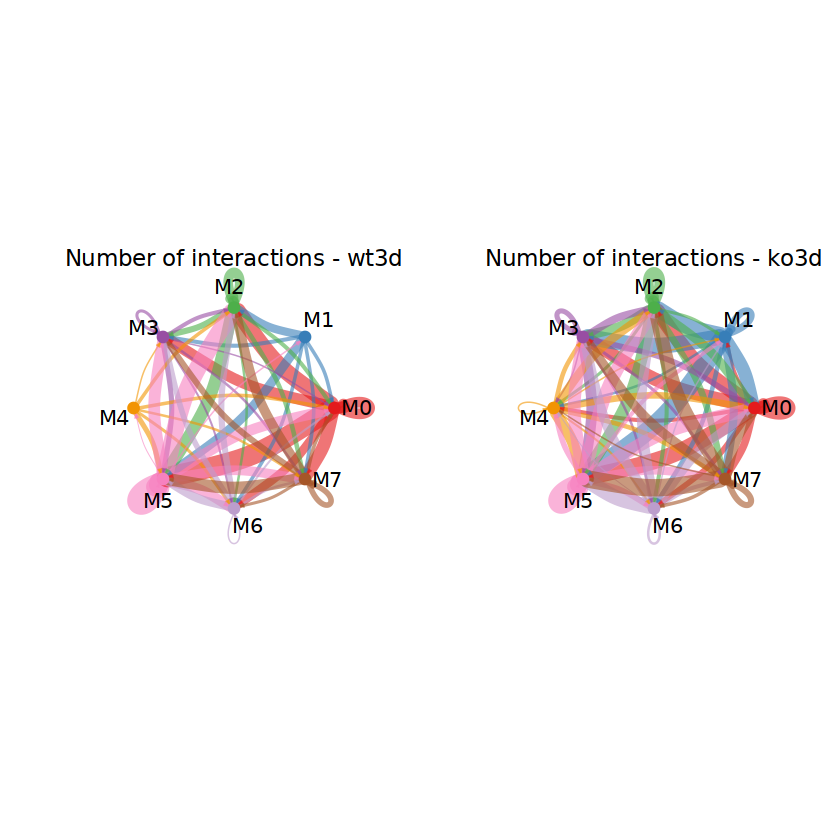

In [13]:
weight.max <- getMaxWeight(object.list, attribute = c("idents","count"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count, weight.scale = T, label.edge= F, edge.weight.max = weight.max[2], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}

In [14]:
group.cellType <- c(rep("a", 4), rep("b", 4), rep("c", 4))
group.cellType <- factor(group.cellType, levels = c("a", "b", "c"))
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.cellType)})
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

ERROR: Error in count[group.merged == i, group.merged == j]: (subscript) logical subscript too long


In [ ]:
weight.max <- getMaxWeight(object.list, slot.name = c("idents", "net", "net"), attribute = c("idents","count", "count.merged"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count.merged, weight.scale = T, label.edge= T, edge.weight.max = weight.max[3], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}

In [15]:
par(mfrow = c(1,2), xpd=TRUE)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "count.merged", label.edge = T)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight.merged", label.edge = T)

ERROR: Error in if (nrow(adjmatrix) != ncol(adjmatrix)) {: argument is of length zero


Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



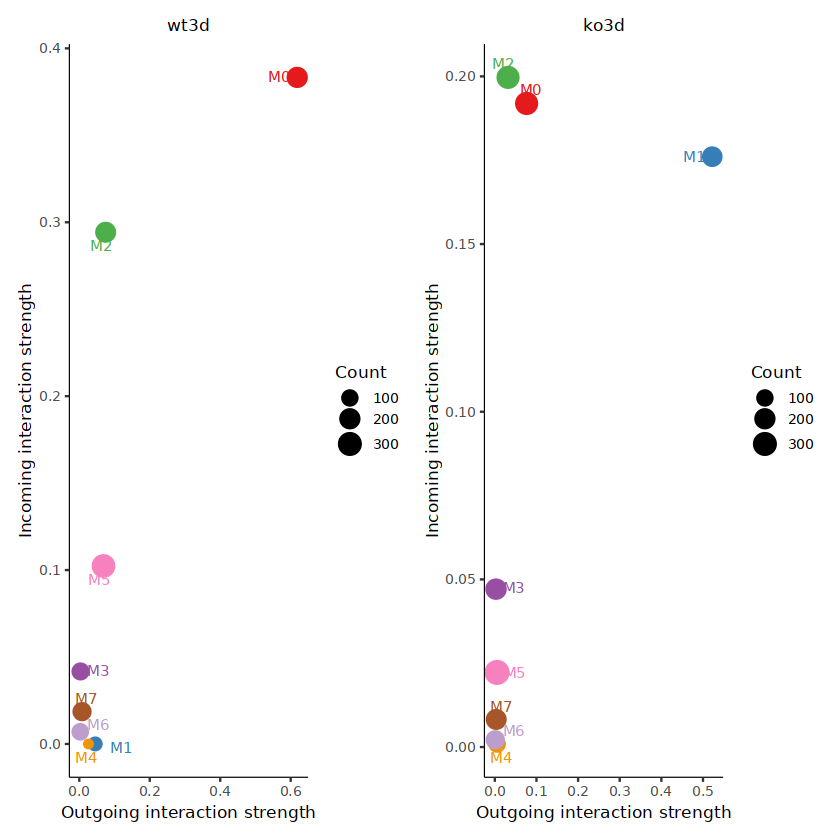

In [16]:
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
patchwork::wrap_plots(plots = gg)

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 


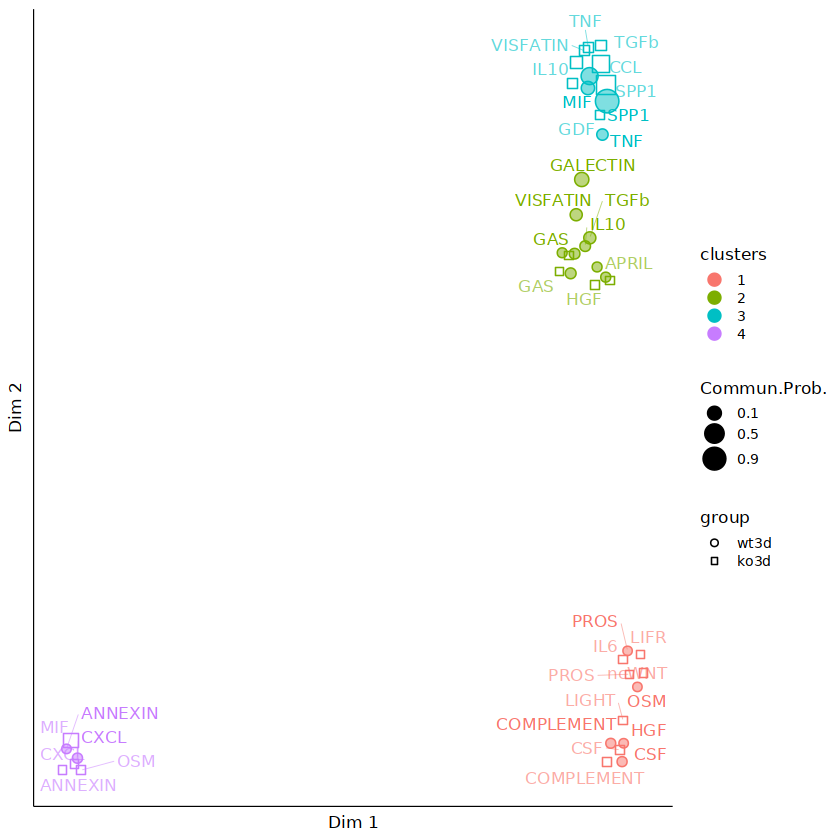

In [17]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")
#> Compute signaling network similarity for datasets 1 2
cellchat <- netEmbedding(cellchat, type = "functional")
#> Manifold learning of the signaling networks for datasets 1 2
cellchat <- netClustering(cellchat, type = "functional",do.parallel = FALSE)
#> Classification learning of the signaling networks for datasets 1 2
# Visualization in 2D-space
netVisual_embeddingPairwise(cellchat, type = "functional", label.size = 3.5)
#> 2D visualization of signaling networks from datasets 1 2

In [18]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "structural")
#> Compute signaling network similarity for datasets 1 2
cellchat <- netEmbedding(cellchat, type = "structural")
#> Manifold learning of the signaling networks for datasets 1 2


Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 


Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 


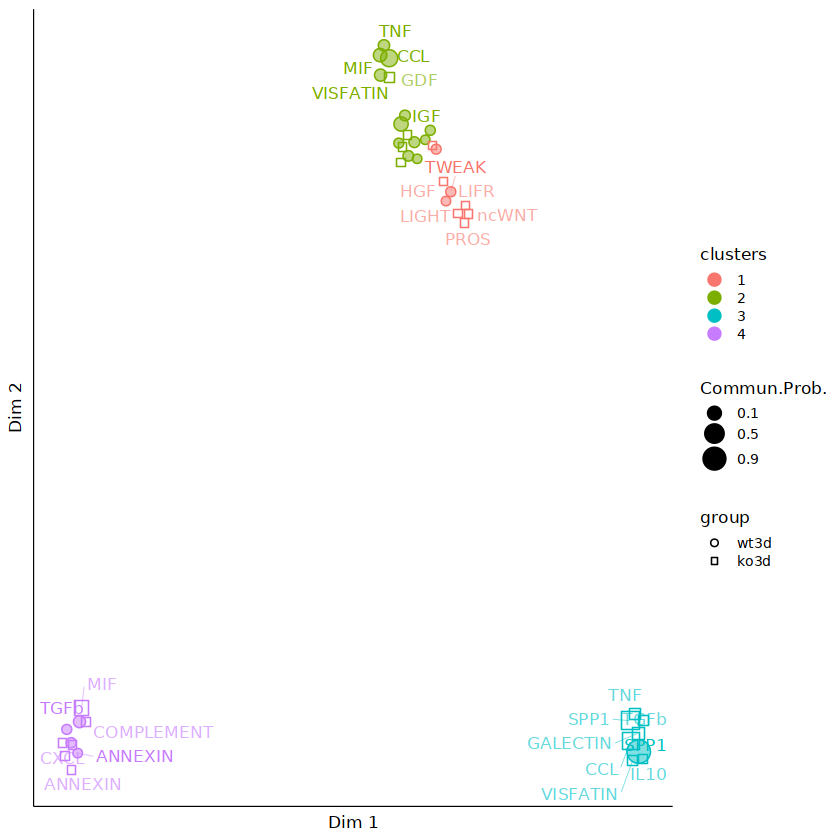

In [19]:
cellchat <- netClustering(cellchat, type = "structural",do.parallel = FALSE)
#> Classification learning of the signaling networks for datasets 1 2
# Visualization in 2D-space
netVisual_embeddingPairwise(cellchat, type = "structural", label.size = 3.5)
#> 2D visualization of signaling networks from datasets 1 2

2D visualization of signaling networks from datasets 1 2 


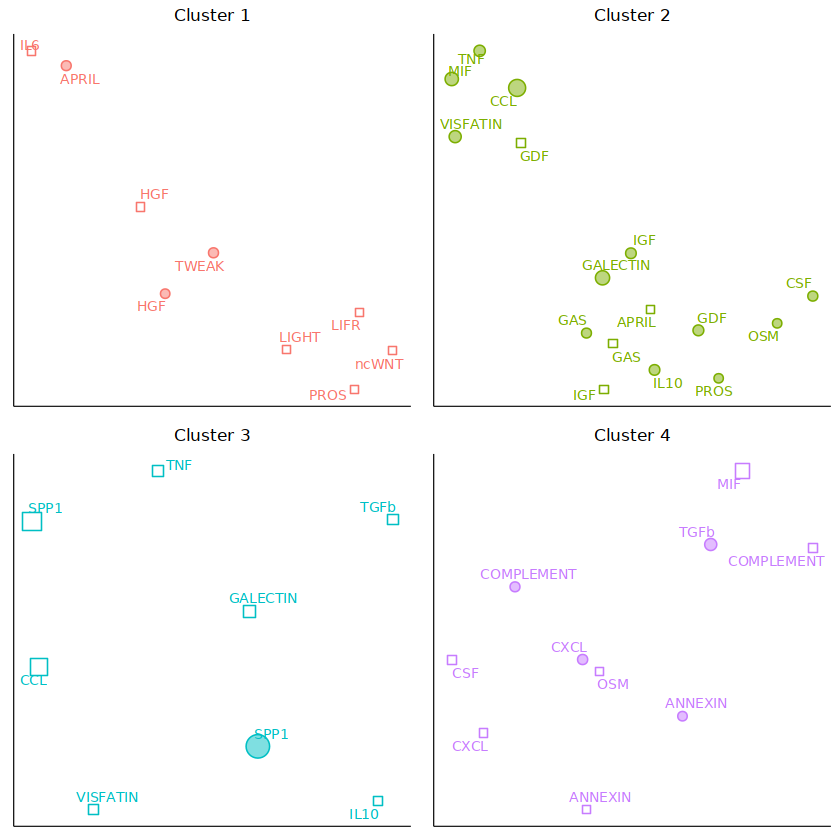

In [20]:
netVisual_embeddingPairwiseZoomIn(cellchat, type = "structural", nCol = 2)
#> 2D visualization of signaling networks from datasets 1 2

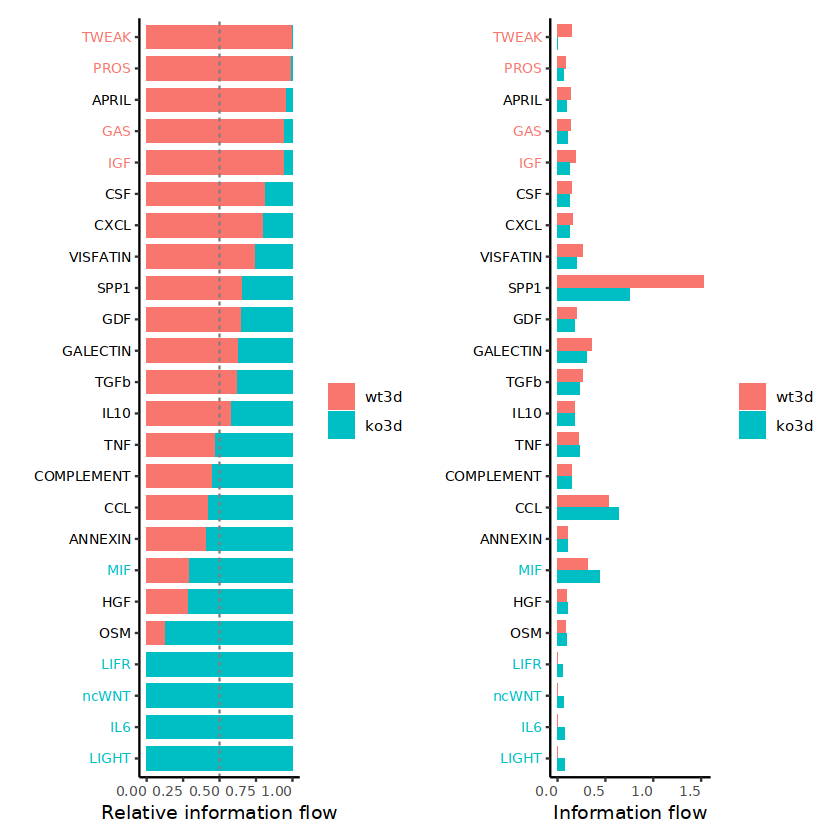

In [21]:
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE)
gg2 <- rankNet(cellchat, mode = "comparison", stacked = F, do.stat = TRUE)
gg1 + gg2

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




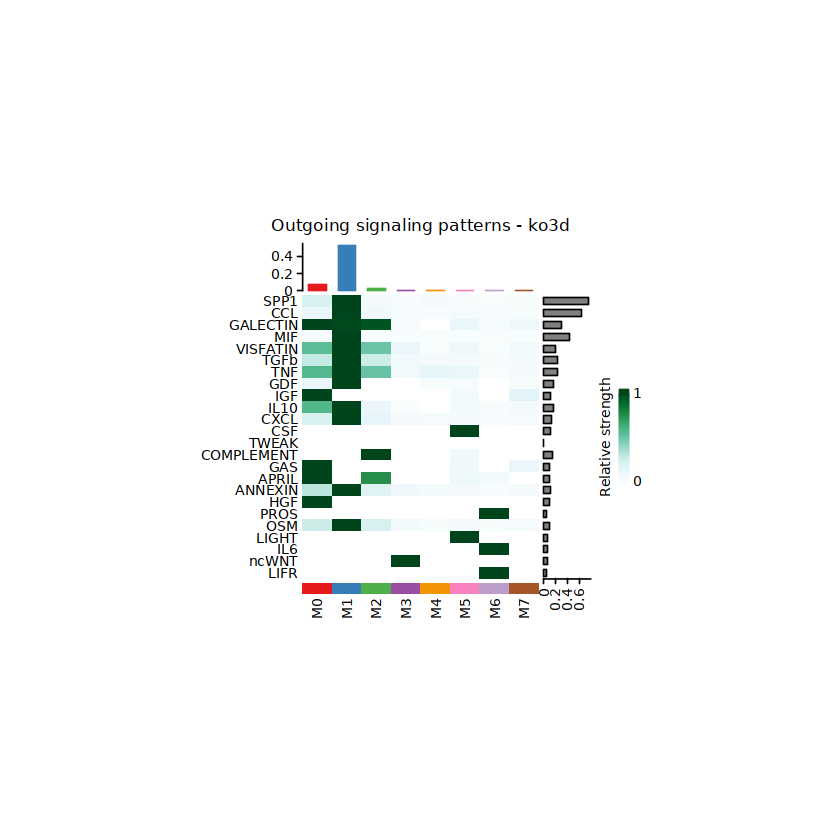

In [22]:
library(ComplexHeatmap)
#> Loading required package: grid
#> ========================================
#> ComplexHeatmap version 2.7.1.1010
#> Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
#> Github page: https://github.com/jokergoo/ComplexHeatmap
#> Documentation: http://jokergoo.github.io/ComplexHeatmap-reference
#> 
#> If you use it in published research, please cite:
#> Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
#>   genomic data. Bioinformatics 2016.
#> 
#> This message can be suppressed by:
#>   suppressPackageStartupMessages(library(ComplexHeatmap))
#> ========================================
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6)
ht1
ht2

In [23]:
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6, color.heatmap = "OrRd")

In [43]:
options(repr.plot.width = 16,repr.plot.height = 12)

In [44]:
p = netVisual_bubble(cellchat, sources.use = c(1),font.size = 16, targets.use = c(2,3,4,5,6,7,8), comparison = c(1,2),  angle.x = 45)
#> Comparing communications on a merged object

Comparing communications on a merged object 




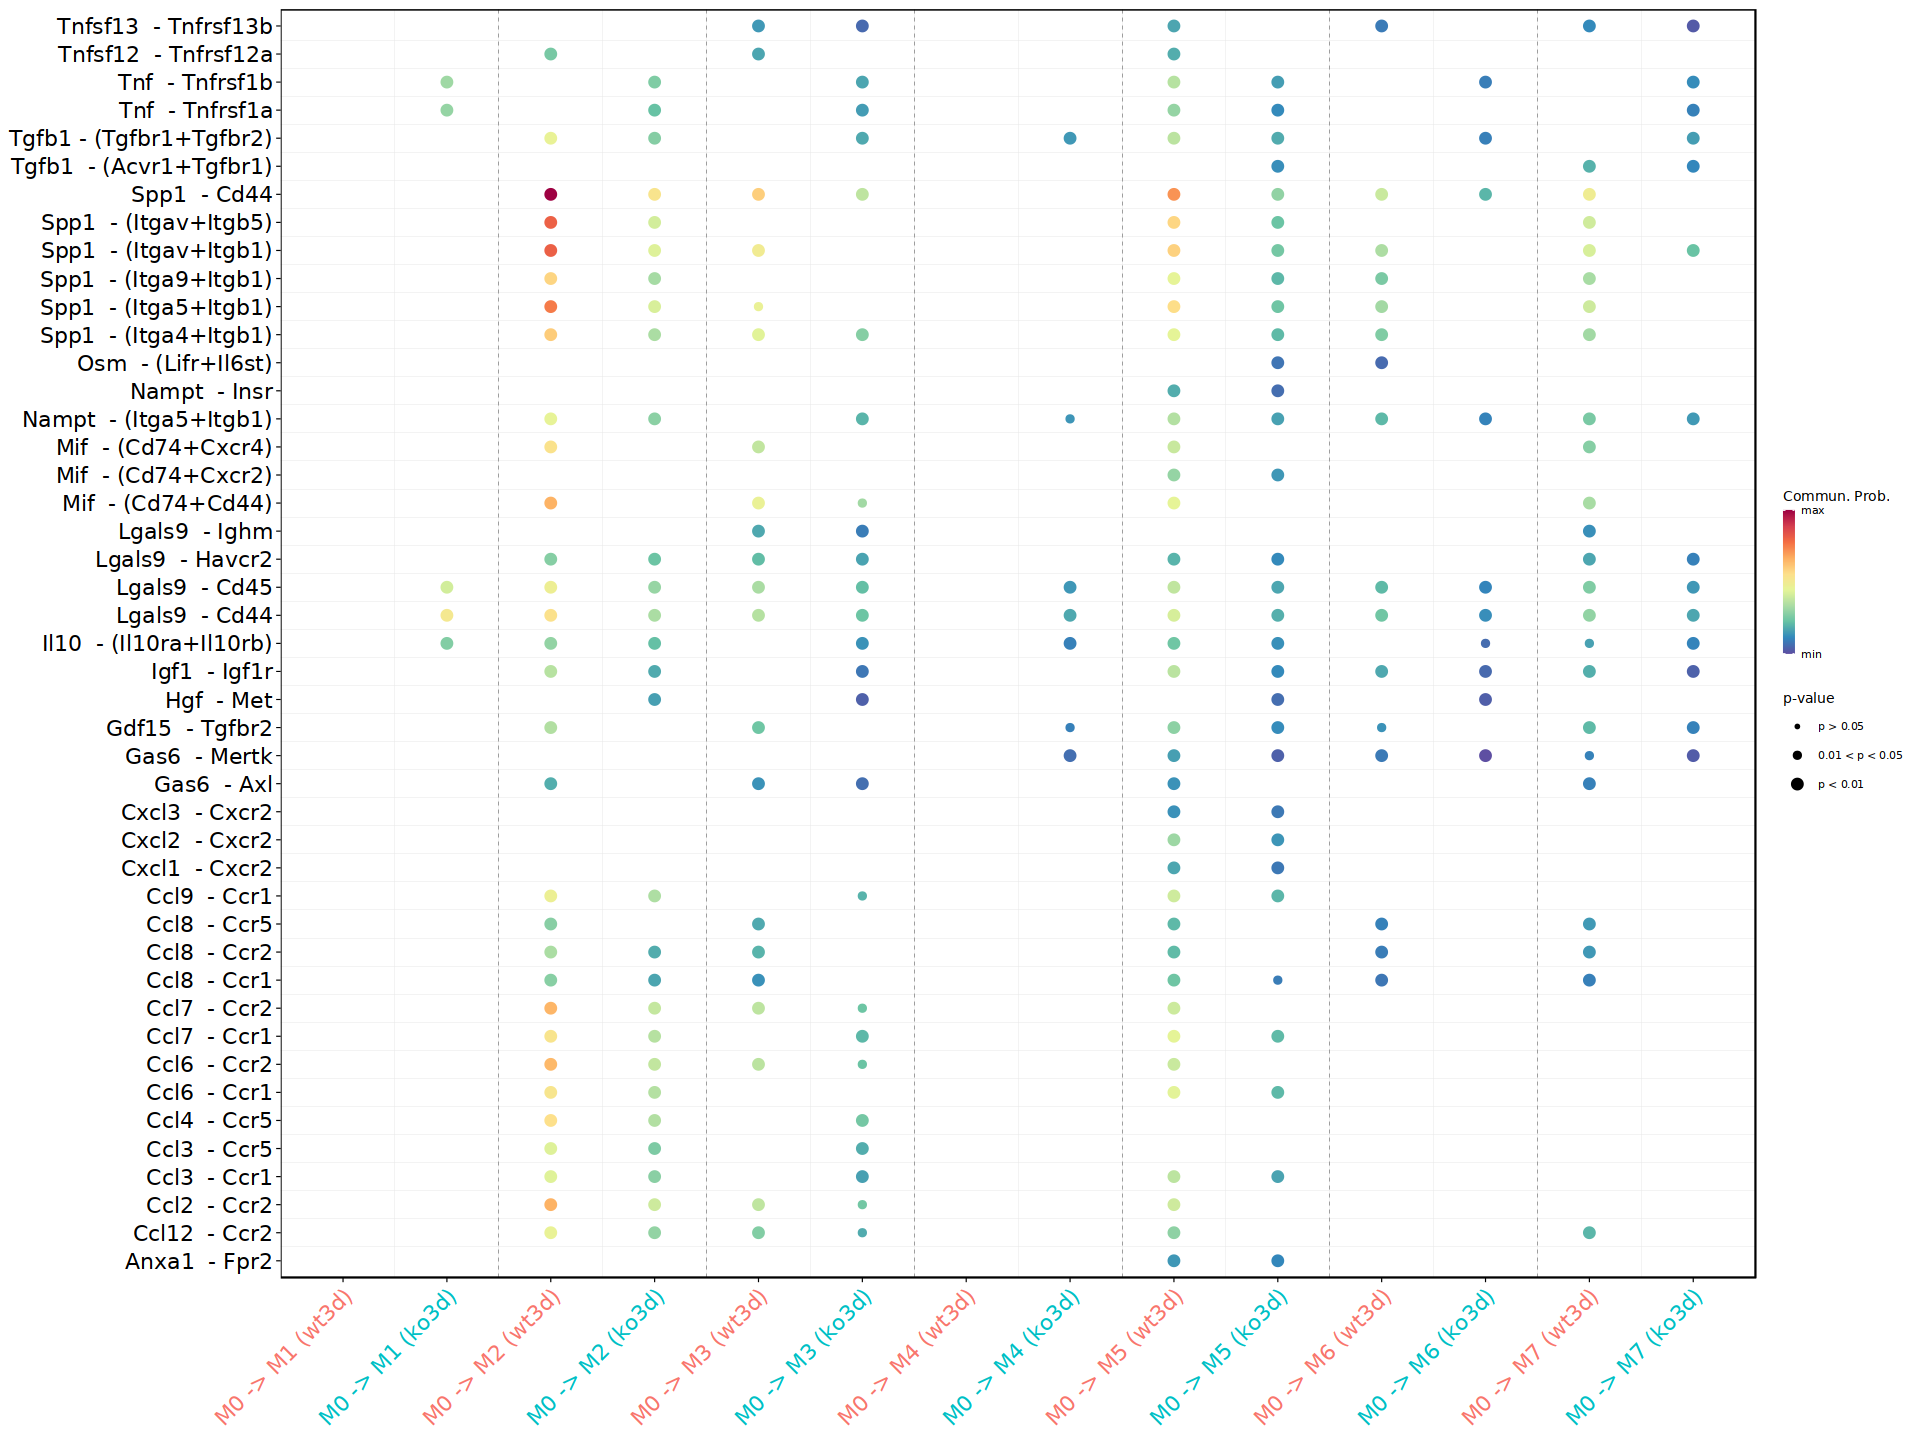

In [45]:
p

In [46]:
pdf('./all.cellchat.pdf',height = 12,width = 16)
print(p)
dev.off()

png 
  2

In [54]:
options(repr.plot.width = 10,repr.plot.height = 9)

In [55]:
p = netVisual_bubble(cellchat, sources.use = c(2,3,4,5,6,7,8), targets.use = c(1), font.size = 16, comparison = c(1, 2),
                  remove.isolate = FALSE, angle.x = 45)  #,signaling = c('SPP1')

Comparing communications on a merged object 




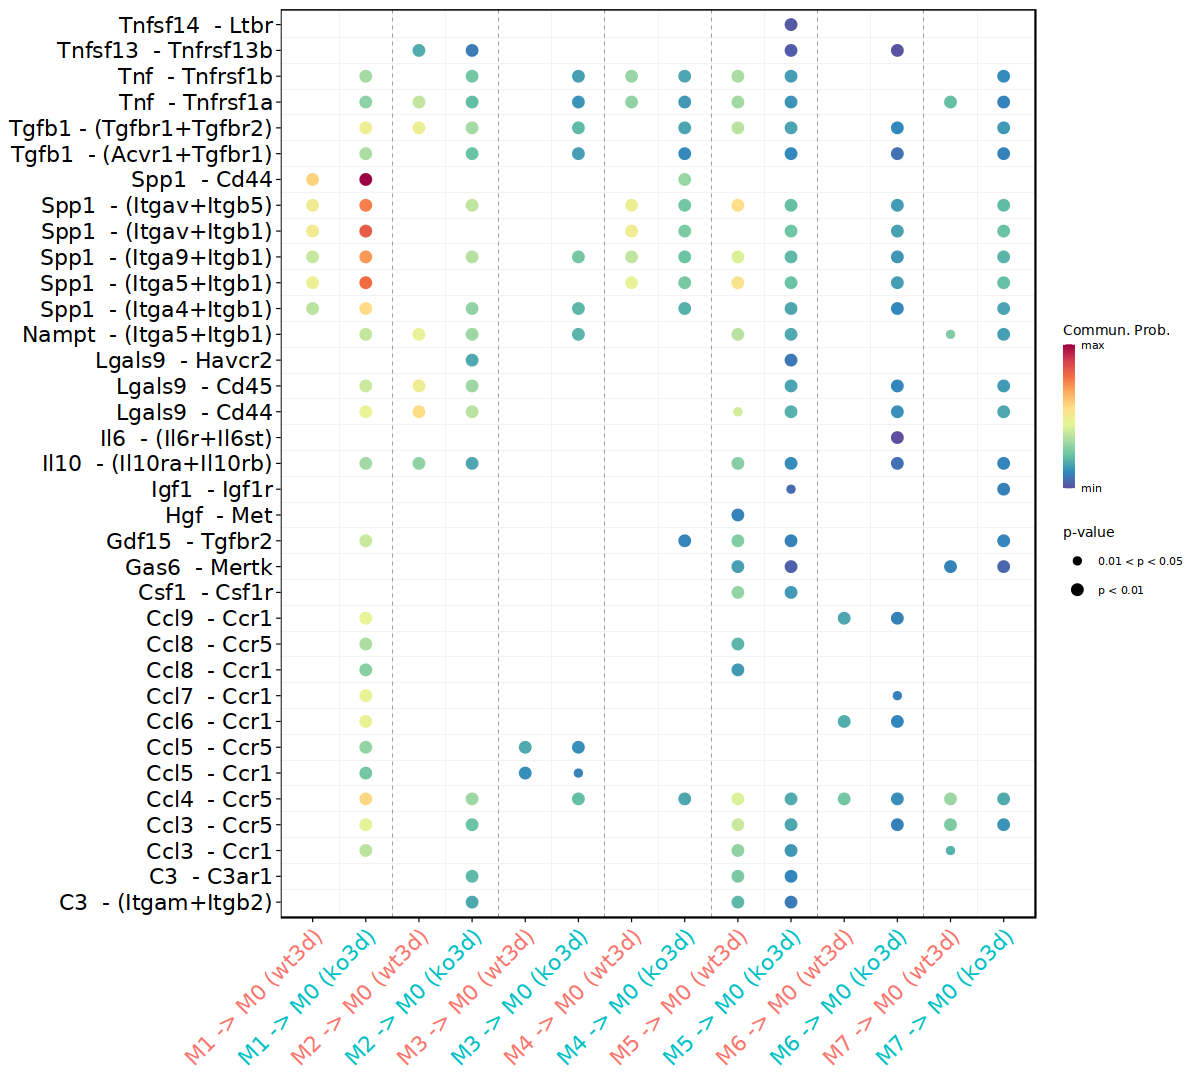

In [56]:
p

In [57]:
pdf('./cellchat.pdf',height = 9,width = 12)
print(p)
dev.off()

png 
  2

In [58]:
getwd()

[1] "/import/DB/workdir/cd40"